### Direct Methods for the solution of Linear Systems

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def work1(A, x_true, relative_errors):
  # Ax = b 
  b = A @ x_true

  # Condition number in norm 2
  cond_2 = np.linalg.cond(A, 2)

  # Condition number in norm inf
  cond_inf = np.linalg.cond(A, np.inf)

  # Solving the system Ax = b
  x_sol = np.linalg.solve(A, b)

  # Computing the relative error between x_true and x_sol
  norm_dif = np.linalg.norm(np.subtract(x_sol, x_true), 2)
  rel_err = norm_dif/(np.linalg.norm(x_true, 2))

  relative_errors.append(rel_err)
  return


def plot_results(x, y, title):
  plt.figure(figsize=(5, 5))
  plt.plot(x, y)
  plt.title(title)
  plt.show()
  print("\n")


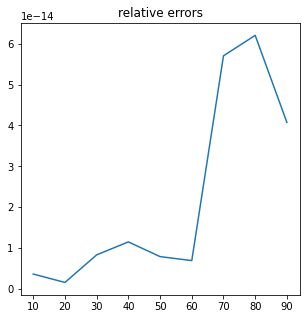

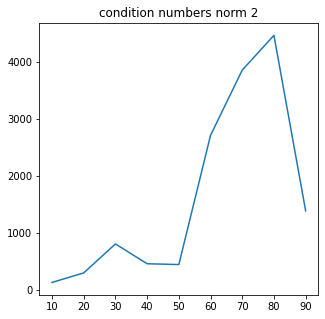

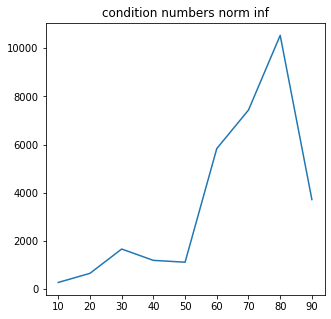

In [16]:
# np.random.seed(42)
n1 = np.arange(10,100,10)
# relative errors of first type of matrix
relative_errors_one = []
cond_numbers_one_1 = []
cond_numbers_one_inf = []

for i in n1:
    A = np.random.rand(i, i)
    x_true = np.ones(i).T
    work1(A, x_true, relative_errors_one)
    
    # cond number
    cond_numbers_one_1.append(np.linalg.cond(A, 2))
    cond_numbers_one_inf.append(np.linalg.cond(A, np.inf))

# Plotting relative errors and condition number
title = "relative errors"
plot_results(n1, relative_errors_one, title)

title = "condition numbers norm 2"
plot_results(n1, cond_numbers_one_1, title)

title = "condition numbers norm inf"
plot_results(n1, cond_numbers_one_inf, title)

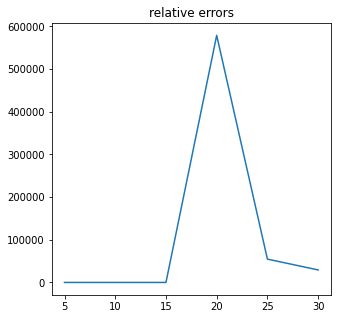

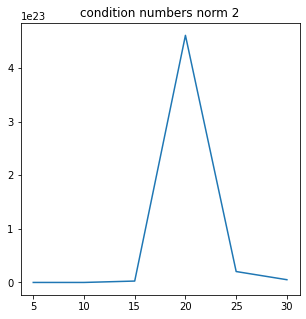

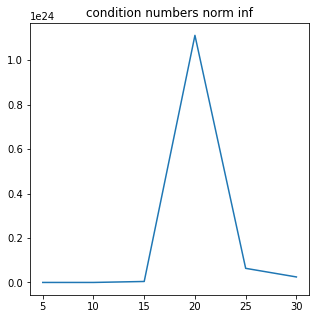

In [17]:
# testing the same problem with vandermonde matrix, n = (5; 10; 15; 20; 25; 30) and x = (1,2, ... , n)
# np.random.seed(42)
n2 = np.arange(5,35,5)
# relative errors of second type of matrix
relative_errors_two = []
cond_numbers_two_2 = []
cond_numbers_two_inf = []

for i in n2:
    x = []
    for i in range(1,i+1):
        x.append(i)
        
    A = np.vander(x)
    x_true = np.ones(i).T
    work1(A, x_true, relative_errors_two)
    
    # cond number
    cond_numbers_two_2.append(np.linalg.cond(A, 2))
    cond_numbers_two_inf.append(np.linalg.cond(A, np.inf))
    
# Plotting relative errors and condition number
title = "relative errors"
plot_results(n2, relative_errors_two, title)

title = "condition numbers norm 2"
plot_results(n2, cond_numbers_two_2, title)

title = "condition numbers norm inf"
plot_results(n2, cond_numbers_two_inf, title)


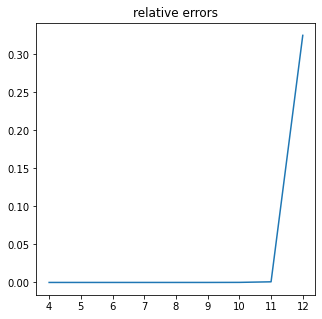

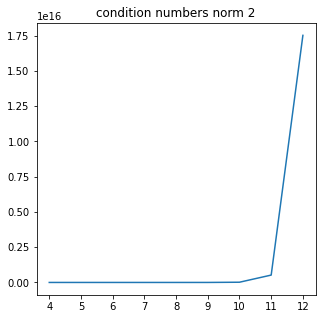

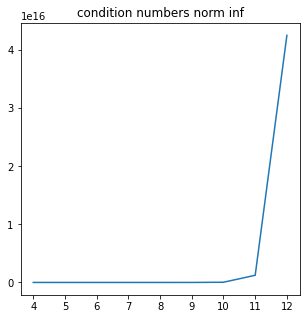

In [18]:
import scipy.linalg
# testing the same problem with Hilbert matrix, n = (4,5,6,...,12) 
# np.random.seed(42)
n3 = np.arange(4,13,1)
# relative errors of third type of matrix
relative_errors_three = []
cond_numbers_three_2 = []
cond_numbers_three_inf = []

for i in n3:
    A = scipy.linalg.hilbert(i)
    x_true = np.ones(i).T
    work1(A, x_true, relative_errors_three)
        
    # cond number
    cond_numbers_three_2.append(np.linalg.cond(A, 2))
    cond_numbers_three_inf.append(np.linalg.cond(A, np.inf))

# Plotting relative errors and condition number
title = "relative errors"
plot_results(n3, relative_errors_three, title)

title = "condition numbers norm 2"
plot_results(n3, cond_numbers_three_2, title)

title = "condition numbers norm inf"
plot_results(n3, cond_numbers_three_inf, title)

### Floating Point Arithmetic

#### epsilon

In [19]:
def machineEpsilon(type):
    machine_epsilon = type(1)
    while type(1)+type(machine_epsilon) != type(1):
        machine_epsilon_last = machine_epsilon
        machine_epsilon = type(machine_epsilon) / type(2)
    return machine_epsilon_last

print("epsilon for float64: {}".format(machineEpsilon(float)))

print("epsilon for float32: {}".format(machineEpsilon(np.float32)))

print("epsilon for float16: {}".format(machineEpsilon(np.float16)))

epsilon for float64: 2.220446049250313e-16
epsilon for float32: 1.1920928955078125e-07
epsilon for float16: 0.0009765625


#### Euler costant

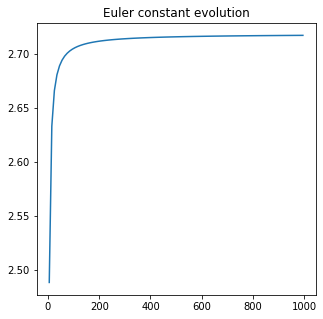



Euler number computed: 2.716917114916988
The sum is reaching one, the curve become stable


In [25]:
# n_euler = np.arange(100,1000010, 100)
n_euler = np.arange(5,1005, 10)

euler_res = []

def euler_formulas(n):
    return (1 + (1/n))**n
    
for i in n_euler:
    euler_res.append(euler_formulas(i))
    
plot_results(n_euler, euler_res, "Euler constant evolution")

# print("euler number numpy: {}".format(np.euler_gamma))
print("Euler number computed: {}".format(euler_res[len(euler_res) - 1]))

print("The sum is reaching one, the curve become stable") 

##### Trying to undestand the conditioned measure 

In [21]:
from sklearn.preprocessing import normalize

matrix = np.arange(0,27,3).reshape(3,3).astype(np.float64)
# array([[  0.,   3.,   6.],
#        [  9.,  12.,  15.],
#        [ 18.,  21.,  24.]])

K_initial = np.linalg.cond(matrix, 2)

# normalization of a matrix in order to see how the K number changes
normed_matrix = normalize(matrix, axis=1, norm='l1')
# [[ 0.          0.33333333  0.66666667]
#  [ 0.25        0.33333333  0.41666667]
#  [ 0.28571429  0.33333333  0.38095238]]

K_normalization = np.linalg.cond(normed_matrix, 2)

print(f"Condition number before: {K_initial}, after: {K_normalization}")

Condition number before: 7.23467899536761e+16, after: 2.1819874537273496e+16


In [22]:
# Trying bigger matrix and the normalized one

dim = 100
upper = 200

matrix = np.random.randint(upper, size=(dim, dim))
print(f"Dimension = {dim} \n {matrix}")

K_initial = np.linalg.cond(matrix, 2)

normed_matrix = normalize(matrix, axis=1, norm='l1')

K_normalization = np.linalg.cond(normed_matrix, 2)

print(f"\n Condition number before: {K_initial}, after: {K_normalization}")


Dimension = 100 
 [[  6   9 193 ...  61 137 196]
 [178  99  83 ...  69  27 115]
 [154  68 158 ...  62 142 179]
 ...
 [140  71 118 ... 110  52 158]
 [106  86  12 ... 185 157   2]
 [ 91  84  69 ...  89 178  14]]

 Condition number before: 18536.693445989094, after: 18448.637968218067


### 3)

In [23]:
A = np.array([[4,2], 
     [1,3]])

B = np.array([[4,2], 
     [2,1]])

print("Rank of A: {}".format(np.linalg.matrix_rank(A)))
print("Rank of A: {}".format(np.linalg.matrix_rank(B)))

print("Eigenvalues of A: {}".format(np.linalg.eigvals(A)))
print("Eigenvalues of B: {}".format(np.linalg.eigvals(B)))

print("\n")
print("The matrix B rank = 1 is confirmed with an eigenvalues equals to 0")

Rank of A: 2
Rank of A: 1
Eigenvalues of A: [5. 2.]
Eigenvalues of B: [5. 0.]


The matrix B rank = 1 is confirmed with an eigenvalues equals to 0


In [24]:
C = np.array([[4,2,6], 
     [1,3,8],
     [5,6,9]])

print("Rank of C: {}".format(np.linalg.matrix_rank(C)))
print("Eigenvalues of C: {}".format(np.linalg.eigvals(C)))

D = np.array([[2,2,6], 
     [4,4,12],
     [0,0,1]])

print("Rank of D: {}".format(np.linalg.matrix_rank(D)))
print("Eigenvalues of D: {}".format(np.linalg.eigvals(D)))

Rank of C: 3
Eigenvalues of C: [16.01590399  2.17042961 -2.1863336 ]
Rank of D: 2
Eigenvalues of D: [0. 6. 1.]
